# Investigate Hotel Business using Data Visualization

Present By\
Muhammad Fu'ad Saifuddin\
Email : muh.fuad.saifuddin@gmail.com\
Linkedin :<https://www.linkedin.com/in/muhammad-fuad-saifuddin/>\
Github : <https://github.com/fuad-saifuddin>

## Background

“Sangat penting bagi suatu perusahaan untuk selalu menganalisa performa bisnisnya. Pada kesempatan kali ini, kita akan lebih mendalami bisnis dalam bidang perhotelan. Fokus yang kita tuju adalah untuk mengetahui bagaimana perilaku pelanggan kita dalam melakukan pemesanan hotel, dan hubungannya terhadap tingkat pembatalan pemesanan hotel. Hasil dari insight yang kita temukan akan kita sajikan dalam bentuk data visualisasi agar lebih mudah dipahami dan bersifat lebih persuasif. ”

## Data Preprocessing

In [1]:
# import modul yang akan dipakai
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np

In [2]:
# input dataset dan mengecek informasi masing masing kolom
df = pd.read_csv('hotel_bookings_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
# melihat jumlah baris data
df.shape[0]

119390

Terdapat 29 kolom dan 119390 baris data pada dataset yang akan digunakan

In [4]:
# memisahkan data kategorik dan data numerik untuk dilihat deskripsi masing masing kolomnya
cat =[]
num =[]

for column in df:
    types = df[column].dtypes
    if types in ['int64', 'float64']:
        num.append(column)
    else :
        cat.append(column)   


In [5]:
# melihat list data categorik dan numerik yang tielah ditentukan
print('categorical =',cat)
print('')
print('numerical =',num)

categorical = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']

numerical = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [6]:
# melihat deskripsi kolom kategorikal 
df[cat].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [7]:
# sampling masing masing isi dari kolom categorical
df[cat].sample(10)

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
101730,City Hotel,January,Breakfast,Kabupaten Bandung,Online TA,TA/TO,No Deposit,Personal,Check-Out
21115,Resort Hotel,March,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out
91652,City Hotel,August,No Meal,Kabupaten Bangka,Direct,Direct,No Deposit,Personal,Check-Out
84908,City Hotel,May,Breakfast,Kota Batu,Offline TA/TO,TA/TO,No Deposit,Family,Check-Out
63118,City Hotel,April,Breakfast,Kota Denpasar,Groups,TA/TO,Non Refund,Personal,Canceled
67825,City Hotel,July,Breakfast,Kota Denpasar,Groups,TA/TO,Non Refund,Personal,Canceled
57936,City Hotel,December,Breakfast,Kabupaten Bandung,Online TA,TA/TO,No Deposit,Family,Canceled
111145,City Hotel,July,Dinner,Kota Batu,Online TA,TA/TO,No Deposit,Personal,Check-Out
38580,Resort Hotel,September,Breakfast,Kota Jakarta Timur,Online TA,TA/TO,No Deposit,Personal,Check-Out
35628,Resort Hotel,June,Breakfast,Kabupaten Bangka,Groups,TA/TO,No Deposit,Family,Check-Out


In [8]:
# melihat deskripsi kolom numerikal 
df[num].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# sampling masing masing isi dari kolom numerical
df[num].sample(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
74023,1,300,2017,33,13,0,2,2,0.0,0,0,1,0,0,1.0,NaN,0,62.00,0,0
71613,1,6,2019,28,9,2,0,1,0.0,0,0,0,0,0,NaN,153.0,0,95.00,0,1
31140,0,0,2019,8,21,0,3,1,0.0,0,1,0,1,0,NaN,516.0,0,42.00,1,2
64250,1,16,2019,9,3,0,2,2,1.0,0,0,0,0,0,9.0,NaN,0,128.00,0,1
34544,0,38,2019,13,27,1,1,2,0.0,0,0,0,0,0,240.0,NaN,0,75.00,1,1
36905,0,138,2019,22,28,2,2,1,0.0,0,0,0,0,0,410.0,NaN,0,49.95,0,1
74663,1,359,2017,42,11,2,0,2,0.0,0,0,1,0,0,1.0,NaN,0,60.00,0,0
119154,0,184,2019,35,29,0,2,2,0.0,0,0,0,0,0,9.0,NaN,0,99.00,0,2
103164,0,0,2019,22,30,0,2,1,0.0,0,1,0,4,0,NaN,408.0,0,95.00,0,0
94297,0,4,2019,3,16,1,0,1,0.0,0,1,1,8,0,NaN,40.0,0,67.00,1,1


In [10]:
# mengecek data bernilai null
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Dari 119390 data, terdapat data bernilai null pada kolom berikut:
1. children = 4 null value
2. city = 488 null value
3. agent = 16340 null value
4. company = 112593 null value

In [11]:
# Mengatasi data null
# Untuk data children, terdapat 4 missing value, disini kita asumsikan pada data children ini, nilai null sama dengan nol, 
# karena kemungkinan besar data null ini menunjukkan bahwa tidak ada pelanggan anak-anak pada riwayat booking tsb.
# Selain itu jika dilihat pada informasi data per kolom, data children memiliki tipe data float, padahal tidak mungkin 
# jumlah anak dalam bentuk pecahan, maka dari itu kami juga akan mengganti tipe data childen menjadi integer

df['children']=df['children'].fillna(0)
df['children']=df['children'].astype('int64')
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               0
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [12]:
# Mengatasi data null
# Untuk data city, terdapat 488 missing value, nilai tersebut cukup kecil dibandingkan dengan keseluruhan data yang berjumlah 119390 (hanya sekitar 0.4 persen)
# kami tidak dapat mengasumsikan nilai sebenarnya dari missing value data city ini karena terlalu banyak kategori city yang ada. 
# karena jumlah datanya cukup kecil dibandingkan keseluruhan data maka data missing value ini akan kami drop.

df = df.dropna(subset=['city'])
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               0
babies                                 0
meal                                   0
city                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16006
company                           112279
days_in_waiting_list                   0
customer_type   

In [13]:
# Mengatasi data null
# Untuk data agent dan company, terdapat cukup banyak missing value. di sini data agent dan company menunjukkan dari agent atau perusahaan mana
# customer melakukan booking hoter. Masing masing nilai pada kedua kolom ini mewakili agency atau perusahaan tersebut. Data null di kolom ini
# menunjukkan bahwa customer melakukan booking tidak dari agent dan/atau perusahaan tertentu. Disini kami menambahkan value baru bernilai nol(0) 
# untuk menunjukkan bahwa customer tidak melakukan booking dari agent dan/atau perusahaan tertentu.

df['company']=df['company'].fillna(0)
df['agent']=df['agent'].fillna(0)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
# melihat value pada kolom is_canceled dan is_repeated_guest
df[['is_canceled','is_repeated_guest']].value_counts()

is_canceled  is_repeated_guest
0            0                    71491
1            0                    43605
0            1                     3254
1            1                      552
dtype: int64

In [15]:
# Dapat dilihat pada data is_canceled dan is_repeated_guest hanya terdapat 2 value yaitu 0 dan 1, data ini menunjukkan apakah 
# pelanggan melakukan cancle/tidak dan apakah pelanggan tersebut memesan lebih dari 1 kali atau tidak.
# Kedua kolom ini memiliki value kategorik yang mana lebih baik diubah datanya menjadi tipe kategorikal

df['is_canceled'] = df['is_canceled'].astype('object')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('object')

In [16]:
# Mengganti tipe data agent dan company karena merupakan data kategorikal
df['agent'] = df['agent'].astype('object')
df['company'] = df['company'].astype('object')

# Memisahkan ulang tipe data kategori dan numerikal
# memisahkan data kategorik dan data numerik untuk dilihat deskripsi masing masing kolomnya
cat =[]
num =[]

for column in df:
    types = df[column].dtypes
    if types in ['int64', 'float64']:
        num.append(column)
    else :
        cat.append(column)   

In [17]:
# melihat value pada kolom meal
df['meal'].value_counts()

Breakfast     91867
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64

In [18]:
# Terdapat kategori undefined pada kolom meal, hal ini kemungkinan pelanggan tidak memilih kategori meal apapun, 
# dengan kata lain pelanggan tidak mengambil paket makan (no meal).
# Maka dari itu untuk mengurangi jenis kategori yang ada, nilai undefined kami ganti menjadi no meal.

df['meal']=df['meal'].replace('Undefined','No Meal')
df['meal'].value_counts()

Breakfast     91867
Dinner        14434
No Meal       11803
Full Board      798
Name: meal, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  object 
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_weekdays_nights        118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118902 non-null  int64  
 11  babies                          118902 non-null  int64  
 12  meal            

In [20]:
# menghitung jumlah keseluruhan pelanggan
df['number_customers'] = df['adults']+df['children']+df['babies']
df['number_customers'].value_counts()

2     81883
1     22289
3     10480
4      3926
0       170
5       137
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: number_customers, dtype: int64

Terlihat bahwa terdapat data aneh pada jumlah pelanggan, dimana ditemukan data dengan jumlah pelanggan = 0, hal ini tidak wajar karena tidak mungkin ada booking kamar hotel dengan jumlah pelanggan sama dengan nol. Untuk itu data dengan jumlah pelanggan sama dengan nol akan kami hapus.

In [21]:
# menghapus data dengan jumlah pelanggan 0
df = df[df['number_customers']!=0]

In [22]:
df['number_customers'].value_counts()

2     81883
1     22289
3     10480
4      3926
5       137
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: number_customers, dtype: int64

In [23]:
# melihat data dengan jumlah pelanggan dewasa 0
df[df['adults']==0][['children','babies']].value_counts()

children  babies
2         0         205
3         0          11
1         0           4
2         1           3
dtype: int64

Terdapat data dimana ada data pelanggan yang hanya berisikan data anak dan bayi tanpa adanya pendampingan dari orang dewasa. Hal ini kemungkinan merupakan kesalahan input data, karena policy dari perusahaan ini tidak mengizinkan adanya anak atau balita yang menginap tanpa pendampingan dari orang dewasa. Maka dari itu data akan kami drop.

In [24]:
# menghapus data dengan jumlah pelanggan dewasa 0
df = df[~((df['adults']==0)&((df['children']>0)|(df['babies']>0)))]

In [25]:
# Melihat adanya data duplicate
df.duplicated().sum()

33208

In [26]:
# menghilangkan data duplikat
df.drop_duplicates(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85301 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85301 non-null  object 
 1   is_canceled                     85301 non-null  object 
 2   lead_time                       85301 non-null  int64  
 3   arrival_date_year               85301 non-null  int64  
 4   arrival_date_month              85301 non-null  object 
 5   arrival_date_week_number        85301 non-null  int64  
 6   arrival_date_day_of_month       85301 non-null  int64  
 7   stays_in_weekend_nights         85301 non-null  int64  
 8   stays_in_weekdays_nights        85301 non-null  int64  
 9   adults                          85301 non-null  int64  
 10  children                        85301 non-null  int64  
 11  babies                          85301 non-null  int64  
 12  meal                           

In [28]:
# Membuat tabel monthly_order untuk menghitung jumlah order per bulan dengan syarat is_canceled = 0
monthly_order = df[df['is_canceled']==0].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count().reset_index()
monthly_order = monthly_order.rename(columns = {'arrival_date_year':'year','arrival_date_month':'month','hotel':'booking_number'})

# Mengganti data bulan dengan angka agar dapat diurutkan sesuai bulan
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
number_month = [1,2,3,4,5,6,7,8,9,10,11,12]
monthly_order['month']=monthly_order['month'].replace(month_list,number_month).astype('object')
monthly_order.sort_values(by=['year','month'])

,year,month,booking_number
2,2017,1,1351
1,2017,2,1557
5,2017,9,1132
4,2017,10,1816
3,2017,11,2119
0,2017,12,2111
10,2018,1,2473
9,2018,2,2088
13,2018,3,1490
6,2018,4,2203


Pada tabel diatas terlihat adanya gap yang tidak wajar, dimana:
1. Pada data tahun 2017 terdapat gap antara bulan januari hingga bulan september
2. Pada tahun 2019 terdapat gap di bulan januari dan februari

Kejanggalan ini mengindikasikan adanya kesalahan penginputan sehingga perlu ditelusuri lebih lanjut.

In [29]:
# melihat value data kolom arrival_date_day_of_month pada bulan februari 2017 dan 2018
print('Feb-2017')
print(df[(df['arrival_date_month']=='February') & (df['arrival_date_year']==2017)]['arrival_date_day_of_month'].value_counts())
print('Feb-2018')
print(df[(df['arrival_date_month']=='February') & (df['arrival_date_year']==2018)]['arrival_date_day_of_month'].value_counts())

Feb-2017
5     183
30    128
29    103
31    102
26     98
27     94
28     92
4      85
24     79
3      61
19     59
23     59
9      57
22     57
10     50
2      50
25     49
6      49
1      44
11     43
17     43
21     41
18     40
16     39
14     38
12     38
20     36
8      32
7      26
15     24
13     18
Name: arrival_date_day_of_month, dtype: int64
Feb-2018
30    185
8     169
27    159
26    146
2     140
29    127
3     119
28    118
24    114
23    112
7     108
5     107
17    100
1      99
22     99
16     97
19     94
9      90
10     89
6      88
21     78
4      77
13     71
31     71
14     70
15     69
12     67
20     66
25     62
18     54
11     30
Name: arrival_date_day_of_month, dtype: int64


Ditemukan bahwa pada data bulan february baik di tahun 2017 maupun 2018, berakhir di tanggal 31, hal tersebut tidak wajar

In [30]:
# melihat data pada kolom arrival_date_day_of_month pada bulan april 2018 dan 2019
print('Apr-2018')
print(df[(df['arrival_date_month']=='April') & (df['arrival_date_year']==2018)]['arrival_date_day_of_month'].value_counts())
print('Apr-2019')
print(df[(df['arrival_date_month']=='April') & (df['arrival_date_year']==2019)]['arrival_date_day_of_month'].value_counts())

Apr-2018
12    170
13    168
26    151
27    150
6     140
5     117
25    110
19    108
20    102
4      97
22     95
14     91
28     87
7      85
15     83
11     81
10     78
24     78
17     77
3      77
8      74
18     73
16     68
29     65
23     65
21     64
1      58
9      55
2      47
Name: arrival_date_day_of_month, dtype: int64
Apr-2019
25    179
13    160
26    155
10    155
17    153
20    150
14    138
4     130
12    128
24    128
27    125
9     124
11    121
19    121
18    115
3     109
23    108
2     104
16    102
21     96
22     96
15     88
6      87
28     78
7      75
1      74
5      69
8      66
Name: arrival_date_day_of_month, dtype: int64


Ditemukan bahwa pada tahun 2018 data bulan April berakhir di tanggal 29, dan pada tahun 2019, data April berakhir di tanggal 28. Hal ini tidaklah wajar.

Kita coba melakukan crosscheck dengan data week number untuk melihat kecenderungan pada kekeliruan value di data ini

In [31]:
# crosscheck data arrival_date_month dengan arrival_date_week_number
print('Jan-2017')
print(df[(df['arrival_date_month']=='January') & (df['arrival_date_year']==2017)]['arrival_date_week_number'].value_counts())
print('Feb-2017')
print(df[(df['arrival_date_month']=='February') & (df['arrival_date_year']==2017)]['arrival_date_week_number'].value_counts())
print('Sep-2017')
print(df[(df['arrival_date_month']=='September') & (df['arrival_date_year']==2017)]['arrival_date_week_number'].value_counts())
print('Oct-2017')
print(df[(df['arrival_date_month']=='October') & (df['arrival_date_year']==2017)]['arrival_date_week_number'].value_counts())
print('Nov-2017')
print(df[(df['arrival_date_month']=='November') & (df['arrival_date_year']==2017)]['arrival_date_week_number'].value_counts())
print('Dec-2017')
print(df[(df['arrival_date_month']=='December') & (df['arrival_date_year']==2017)]['arrival_date_week_number'].value_counts())

print('Jan-2018')
print(df[(df['arrival_date_month']=='January') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Feb-2018')
print(df[(df['arrival_date_month']=='February') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Mar-2018')
print(df[(df['arrival_date_month']=='March') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Apr-2018')
print(df[(df['arrival_date_month']=='April') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('May-2018')
print(df[(df['arrival_date_month']=='May') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Jun-2018')
print(df[(df['arrival_date_month']=='June') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Jul-2018')
print(df[(df['arrival_date_month']=='July') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Aug-2018')
print(df[(df['arrival_date_month']=='Augustus') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Sep-2018')
print(df[(df['arrival_date_month']=='September') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Oct-2018')
print(df[(df['arrival_date_month']=='October') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Nov-2018')
print(df[(df['arrival_date_month']=='November') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())
print('Dec-2018')
print(df[(df['arrival_date_month']=='December') & (df['arrival_date_year']==2018)]['arrival_date_week_number'].value_counts())

print('Mar-2019')
print(df[(df['arrival_date_month']=='March') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())
print('Apr-2019')
print(df[(df['arrival_date_month']=='April') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())
print('May-2019')
print(df[(df['arrival_date_month']=='May') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())
print('Jun-2019')
print(df[(df['arrival_date_month']=='June') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())
print('Jul-2019')
print(df[(df['arrival_date_month']=='July') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())
print('Aug-2019')
print(df[(df['arrival_date_month']=='Augustus') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())
print('Sep-2019')
print(df[(df['arrival_date_month']=='September') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())
print('Oct-2019')
print(df[(df['arrival_date_month']=='October') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())
print('Nov-2019')
print(df[(df['arrival_date_month']=='November') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())
print('Dec-2019')
print(df[(df['arrival_date_month']=='December') & (df['arrival_date_year']==2019)]['arrival_date_week_number'].value_counts())

Jan-2017
45    419
48    410
47    387
46    314
49     58
Name: arrival_date_week_number, dtype: int64
Feb-2017
53    519
49    423
52    419
50    295
51    261
Name: arrival_date_week_number, dtype: int64
Sep-2017
30    394
29    365
28    344
31    320
27    212
Name: arrival_date_week_number, dtype: int64
Oct-2017
33    626
34    555
35    506
32    477
36    134
31     84
Name: arrival_date_week_number, dtype: int64
Nov-2017
38    644
37    632
39    628
36    466
40    286
Name: arrival_date_week_number, dtype: int64
Dec-2017
41    656
43    643
42    543
44    444
40    250
Name: arrival_date_week_number, dtype: int64
Jan-2018
47    854
46    803
48    748
45    566
49    296
Name: arrival_date_week_number, dtype: int64
Feb-2018
53    868
50    728
52    617
51    504
49    358
Name: arrival_date_week_number, dtype: int64
Mar-2018
4    434
5    432
3    395
2    351
1    142
6     31
Name: arrival_date_week_number, dtype: int64
Apr-2018
9     713
7     711
8     602
6     536
1

Dari Hasil Cross Check di atas dapat diketahui bahwa terdapat ketidaksesiauain penamaan bulan terhadap week number. kecenderungan yang terjadi adalah sebagai berikut:
1. Data bulan January dan Bulan February secara berurut merupakan data dengan week number di bulan November dan December.
2. Data bulan Maret hingga December secara berurut merupakan data bulan January hingga Oktober.

In [32]:
# Koreksi data bulan sesuai hasil cross check data week number
month_false_list = ['March','April','May','June','July','August','September','October','November','December','January','February']
month_true_list = ['January','February','March','April','May','June','July','August','September','October','November','December']

df['arrival_date_month'] = df['arrival_date_month'].replace(month_false_list,month_true_list)

In [33]:
# Membuat tabel monthly_order untuk menghitung jumlah order per bulan dengan syarat is_canceled = 0
monthly_order = df[df['is_canceled']==0].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count().reset_index()
monthly_order = monthly_order.rename(columns = {'arrival_date_year':'year','arrival_date_month':'month','hotel':'number_of_booking'})

# Mengganti data bulan dengan angka agar dapat diurutkan sesuai bulan
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
number_month = [1,2,3,4,5,6,7,8,9,10,11,12]
monthly_order['month']=monthly_order['month'].replace(month_list,number_month).astype('object')
monthly_order.sort_values(by=['year','month'])

,year,month,number_of_booking
2,2017,7,1132
0,2017,8,1816
5,2017,9,2119
4,2017,10,2111
3,2017,11,1351
1,2017,12,1557
10,2018,1,1490
9,2018,2,2203
13,2018,3,2874
6,2018,4,2691


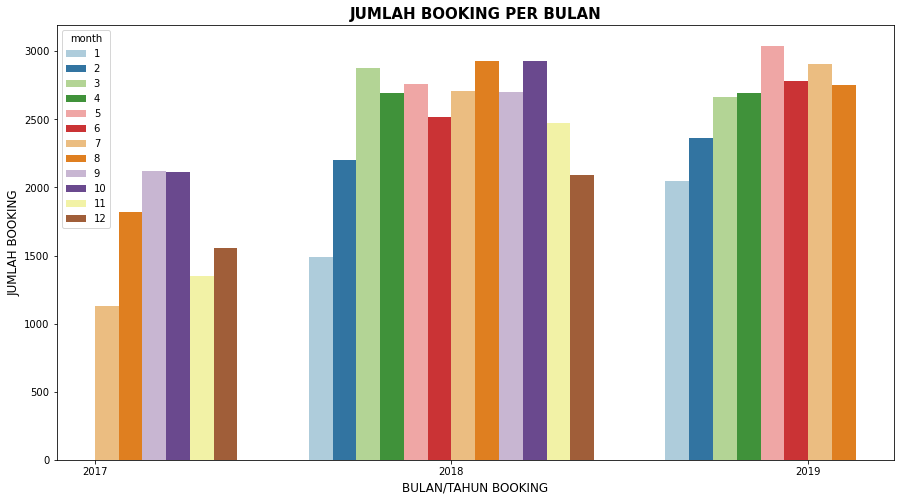

In [34]:
# Visualisasi Monthly Customers 
plt.figure(figsize = (15,8))
sns.barplot(data=monthly_order, x='year', y='number_of_booking', hue='month', palette='Paired')
plt.title('JUMLAH BOOKING PER BULAN',fontsize=15,weight='bold')
plt.xlabel('BULAN/TAHUN BOOKING',fontsize=12)
plt.ylabel('JUMLAH BOOKING',fontsize=12)
plt.plot()
plt.show()

Dari grafik di atas dapat dilihat bahwa adanya kecenderungan penguragan jumlah pelanggan pada awal tahun dan akhir tahun (November-February). Bulan tersebut bertepatan denga musim penghujan di indonesia. Hal ini menunjukkan bahwa ada kemungkinan pelanggan lebih jarang bepergian dan menginap di hotel pada musim penghujan.


In [35]:
df['hotel'].value_counts()

City Hotel      52201
Resort Hotel    33100
Name: hotel, dtype: int64

In [36]:
# Membuat tabel monthly_order untuk menghitung jumlah order per bulan per tipe hotel dengan syarat is_canceled = 0
monthly_order_hotel = df[df['is_canceled']==0].groupby(['hotel','arrival_date_year','arrival_date_month']).agg({'lead_time':'count'}).reset_index()
monthly_order_hotel = monthly_order_hotel.rename(columns = {'arrival_date_year':'year','arrival_date_month':'month','lead_time':'number_booking'})
monthly_order_hotel

# Mengganti data bulan dengan angka agar dapat diurutkan sesuai bulan
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
number_month = [1,2,3,4,5,6,7,8,9,10,11,12]
monthly_order_hotel['month']=monthly_order_hotel['month'].replace(month_list,number_month).astype('object')
monthly_order_hotel.sort_values(by=['hotel','year','month'])

,hotel,year,month,number_booking
2,City Hotel,2017,7,150
0,City Hotel,2017,8,826
5,City Hotel,2017,9,1245
4,City Hotel,2017,10,1171
3,City Hotel,2017,11,626
1,City Hotel,2017,12,776
10,City Hotel,2018,1,794
9,City Hotel,2018,2,1249
13,City Hotel,2018,3,1703
6,City Hotel,2018,4,1640


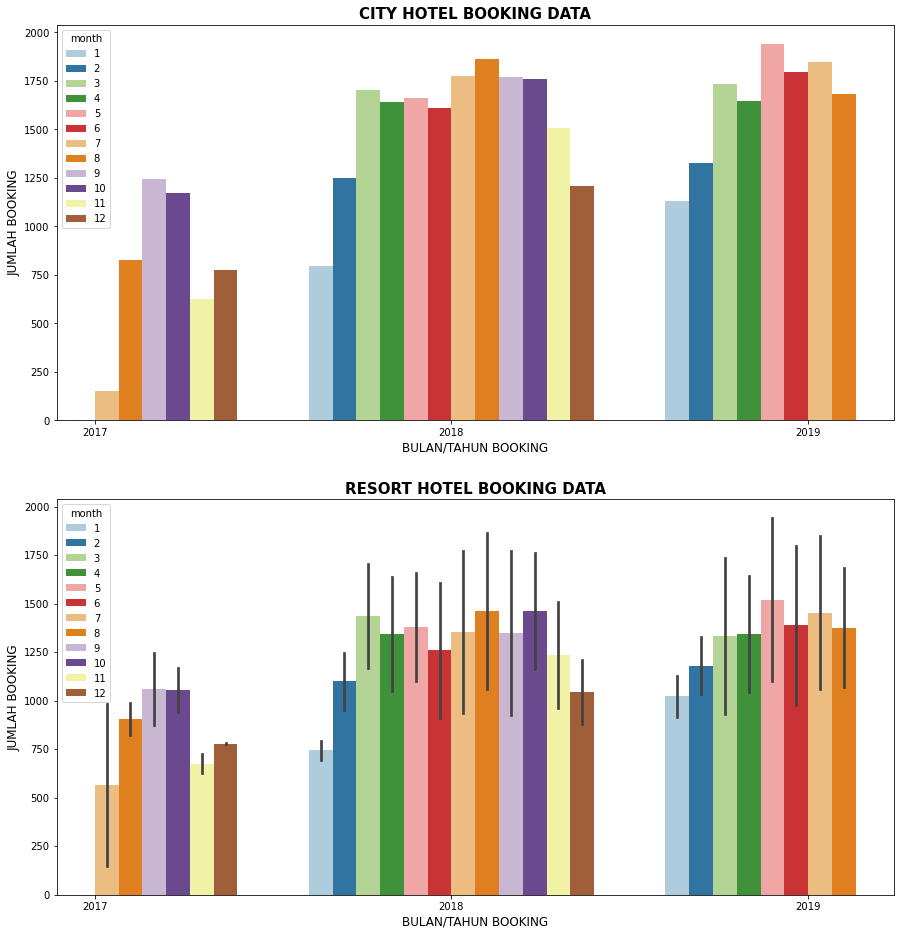

In [37]:
# Memisahkan data order per jenis hotel
city_hotel = monthly_order_hotel[monthly_order_hotel['hotel']=='City Hotel']
resort_hotel = monthly_order_hotel[monthly_order_hotel['hotel']=='Resort Hotel']
list_hotel = [city_hotel,monthly_order_hotel]

# Membuat visualisasi data jumlah order per bulan
list_title = ['CITY HOTEL BOOKING DATA','RESORT HOTEL BOOKING DATA']
plt.figure(figsize=(15,16))
for i in range (0,2):
  plt.subplot(2,1,i+1)
  sns.barplot(data=list_hotel[i], x='year', y='number_booking', hue='month', palette='Paired').set_title(list_title[i],fontsize=15,weight='bold')
  plt.xlabel('BULAN/TAHUN BOOKING',fontsize=12)
  plt.ylabel('JUMLAH BOOKING',fontsize=12)
  plt.plot()

Dapat dilihat bahwasannya jumlah booking per bulan dari resort hotel lebih sedikit jika dibandingkan dengan city hotel. Hal ini menunjukkan bahwa kemungkinan sebagia besar pelanggan jasa perhotelan di perusahaan ini menginap dalam rangka bisnis dan bukan liburan.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85301 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85301 non-null  object 
 1   is_canceled                     85301 non-null  object 
 2   lead_time                       85301 non-null  int64  
 3   arrival_date_year               85301 non-null  int64  
 4   arrival_date_month              85301 non-null  object 
 5   arrival_date_week_number        85301 non-null  int64  
 6   arrival_date_day_of_month       85301 non-null  int64  
 7   stays_in_weekend_nights         85301 non-null  int64  
 8   stays_in_weekdays_nights        85301 non-null  int64  
 9   adults                          85301 non-null  int64  
 10  children                        85301 non-null  int64  
 11  babies                          85301 non-null  int64  
 12  meal                           

In [39]:
# Membuat kolom baru berisi data total malam menginap
df['total_stays_nights']=df['stays_in_weekend_nights']+df['stays_in_weekdays_nights']

In [40]:
df['total_stays_nights'].describe()

count    85301.000000
mean         3.646581
std          2.735971
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         56.000000
Name: total_stays_nights, dtype: float64

In [41]:
df['total_stays_nights'].value_counts()

3     17433
1     16659
2     15192
4     13309
7      7445
5      6658
6      3232
10     1067
8      1052
14      854
9       775
0       581
11      364
12      196
13      128
15       68
21       55
28       34
16       33
19       22
18       22
17       20
25       14
29       13
20       13
22       12
30       11
24        6
26        6
35        5
23        5
27        4
42        4
56        2
33        2
45        1
38        1
46        1
48        1
34        1
Name: total_stays_nights, dtype: int64

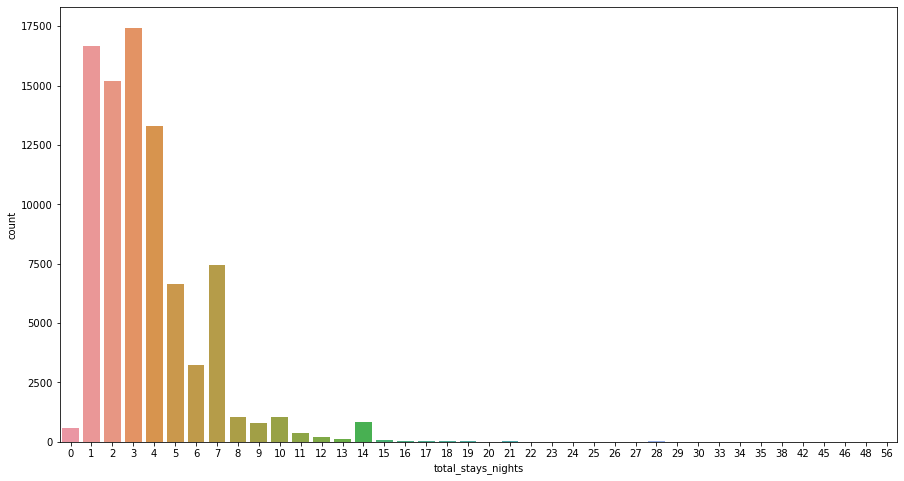

In [42]:
# melihat distribusi data total menginap
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='total_stays_nights')
plt.show()

Dari grafik diatas deapat dilihat bahwa persebaran data total_stays_nights memiliki distribusi yang berbentuk skew positive, maka dari itu apabila pengelompokan booking berdasarkan jumlah malam menginap akan diklasifikasikan berdasarkan nilai quartil data.

In [43]:
# mengkategorikan booking berdasarkan jumlah malam menginap
q1 = df['total_stays_nights'].quantile(0.25)
q2 = df['total_stays_nights'].quantile(0.5)
q3 = df['total_stays_nights'].quantile(0.75)

df['stays_category'] = np.where(df['total_stays_nights']<=q1,'short_term(1-2_nights)',np.where(df['total_stays_nights']>q3 ,'long_term(>5_nights)','medium_term(3-5_nights)'))

In [44]:
df[['total_stays_nights','stays_category']]

,total_stays_nights,stays_category
0,0,short_term(1-2_nights)
1,0,short_term(1-2_nights)
2,1,short_term(1-2_nights)
3,1,short_term(1-2_nights)
4,2,short_term(1-2_nights)
...,...,...
119385,7,long_term(>5_nights)
119386,7,long_term(>5_nights)
119387,7,long_term(>5_nights)
119388,7,long_term(>5_nights)


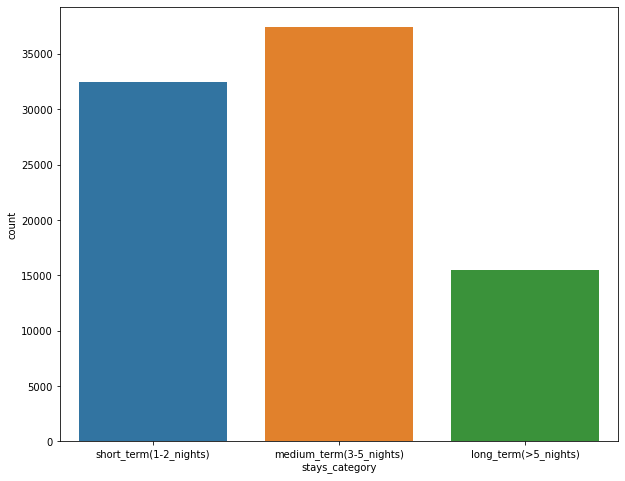

In [45]:
# visualisasi data kategori booking berdasarkan jumlah melam menginap
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='stays_category')
plt.show()

Mayoritas pelanggan melakukan booking dengan medium term stay nights (3-5 malam) 

In [46]:
# menghitung jumlah booking dan persentase canceled booking berdasarkan durasi menginap
stays_category_risk = df.groupby(['stays_category','is_canceled'])['lead_time'].count().reset_index().rename(columns={'lead_time':'number_booking'})
stays_category_risk['percentage'] = 100*(stays_category_risk['number_booking']/stays_category_risk.groupby(['stays_category'])['number_booking'].transform('sum'))
stays_category_risk

,stays_category,is_canceled,number_booking,percentage
0,long_term(>5_nights),0,10434,67.451031
1,long_term(>5_nights),1,5035,32.548969
2,medium_term(3-5_nights),0,26057,69.671123
3,medium_term(3-5_nights),1,11343,30.328877
4,short_term(1-2_nights),0,25199,77.697953
5,short_term(1-2_nights),1,7233,22.302047


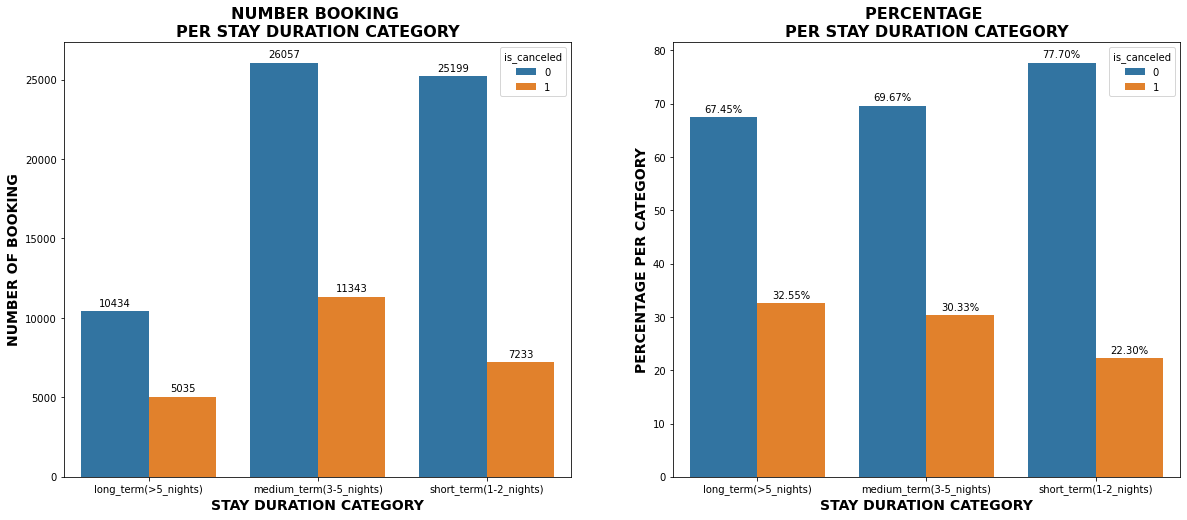

In [47]:
# visualisasi data kategori durasi menginap
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
ax = sns.barplot(data=stays_category_risk, x='stays_category', y= 'number_booking', ax=axes[0], hue='is_canceled')
ax.set_title ('NUMBER BOOKING \nPER STAY DURATION CATEGORY', fontsize = 16, weight='bold' )
ax.set_xlabel ('STAY DURATION CATEGORY', fontsize = 14, weight='bold')
ax.set_ylabel ('NUMBER OF BOOKING', fontsize = 14, weight='bold')
for p in ax.patches:
  ax.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')


ax1 = sns.barplot(data=stays_category_risk, x='stays_category', y= 'percentage', ax=axes[1], hue='is_canceled')
ax1.set_title ('PERCENTAGE \nPER STAY DURATION CATEGORY', fontsize = 16, weight='bold' )
ax1.set_xlabel ('STAY DURATION CATEGORY', fontsize = 14, weight='bold')
ax1.set_ylabel ('PERCENTAGE PER CATEGORY', fontsize = 14, weight='bold')
for p in ax1.patches:
  ax1.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')
plt.show()

Mayoritas pemesanan memiliki durasi menginap medium (3-5 malam)

Pesanan dengan durasi menginap short (1-2 malam) memiliki resiko cancel yang paling kecil

In [48]:
# menghitung jumlah booking dan persentase canceled booking berdasarkan durasi menginap per jenis hotel
hotel_stays_category_risk = df.groupby(['hotel','stays_category','is_canceled'])['lead_time'].count().reset_index().rename(columns={'lead_time':'number_booking'})
hotel_stays_category_risk['percentage'] = 100*(hotel_stays_category_risk['number_booking']/hotel_stays_category_risk.groupby(['hotel','stays_category'])['number_booking'].transform('sum'))
hotel_stays_category_risk

,hotel,stays_category,is_canceled,number_booking,percentage
0,City Hotel,long_term(>5_nights),0,2674,58.168371
1,City Hotel,long_term(>5_nights),1,1923,41.831629
2,City Hotel,medium_term(3-5_nights),0,18380,68.520728
3,City Hotel,medium_term(3-5_nights),1,8444,31.479272
4,City Hotel,short_term(1-2_nights),0,15389,74.056785
5,City Hotel,short_term(1-2_nights),1,5391,25.943215
6,Resort Hotel,long_term(>5_nights),0,7760,71.376012
7,Resort Hotel,long_term(>5_nights),1,3112,28.623988
8,Resort Hotel,medium_term(3-5_nights),0,7677,72.588880
9,Resort Hotel,medium_term(3-5_nights),1,2899,27.411120


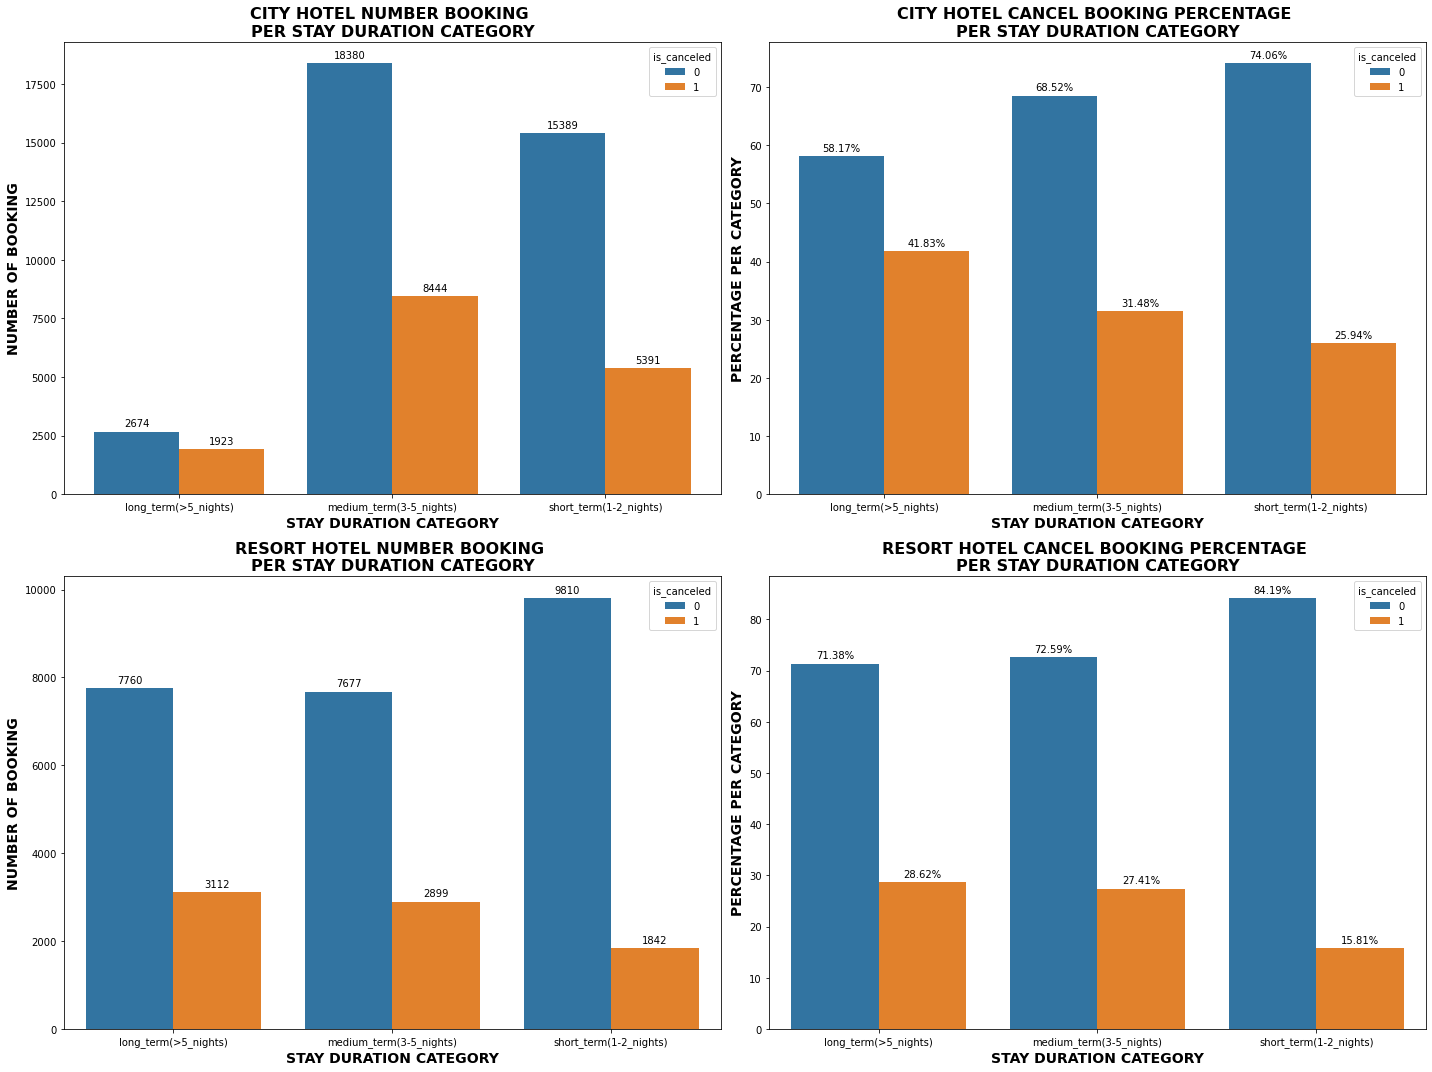

In [49]:
# visualisasi data kategori durasi menginap per jenis hotel
city = hotel_stays_category_risk[hotel_stays_category_risk['hotel']=='City Hotel']
resort = hotel_stays_category_risk[hotel_stays_category_risk['hotel']=='Resort Hotel']

plt.figure (figsize=(20,15))

plt.subplot(2,2,1)
ax = sns.barplot(data=city, x='stays_category', y= 'number_booking', hue='is_canceled')
ax.set_title ('CITY HOTEL NUMBER BOOKING \nPER STAY DURATION CATEGORY', fontsize = 16, weight='bold' )
ax.set_xlabel ('STAY DURATION CATEGORY', fontsize = 14, weight='bold')
ax.set_ylabel ('NUMBER OF BOOKING', fontsize = 14, weight='bold')
plt.plot()
for p in ax.patches:
  ax.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

plt.subplot(2,2,2)
ax1 = sns.barplot(data=city, x='stays_category', y= 'percentage', hue='is_canceled')
ax1.set_title ('CITY HOTEL CANCEL BOOKING PERCENTAGE \nPER STAY DURATION CATEGORY', fontsize = 16, weight='bold' )
ax1.set_xlabel ('STAY DURATION CATEGORY', fontsize = 14, weight='bold')
ax1.set_ylabel ('PERCENTAGE PER CATEGORY', fontsize = 14, weight='bold')
plt.plot()
for p in ax1.patches:
  ax1.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

plt.subplot(2,2,3)
ax2 = sns.barplot(data=resort, x='stays_category', y= 'number_booking', hue='is_canceled')
ax2.set_title ('RESORT HOTEL NUMBER BOOKING \nPER STAY DURATION CATEGORY', fontsize = 16, weight='bold' )
ax2.set_xlabel ('STAY DURATION CATEGORY', fontsize = 14, weight='bold')
ax2.set_ylabel ('NUMBER OF BOOKING', fontsize = 14, weight='bold')
for p in ax2.patches:
  ax2.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

plt.subplot(2,2,4)
ax3 = sns.barplot(data=resort, x='stays_category', y= 'percentage', hue='is_canceled')
ax3.set_title ('RESORT HOTEL CANCEL BOOKING PERCENTAGE \nPER STAY DURATION CATEGORY', fontsize = 16, weight='bold' )
ax3.set_xlabel ('STAY DURATION CATEGORY', fontsize = 14, weight='bold')
ax3.set_ylabel ('PERCENTAGE PER CATEGORY', fontsize = 14, weight='bold')
for p in ax3.patches:
  ax3.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')
plt.tight_layout()
plt.show()

Resort hotel lebih diminati untuk pemesanan dengan durasi menginap long term (>5 malam) dibandingkan dengan city hotel.

Pada city hotel maupun rwsort hotel,pesanan dengan durasi menginap short (1-2 malam) memiliki resiko cancel yang paling kecil

In [50]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,number_customers,total_stays_nights
count,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000,85301.000000
mean,79.514355,2018.217067,26.796825,15.806063,1.011313,2.635268,1.889685,0.136294,0.011008,0.030433,0.179670,0.268789,0.646569,107.116518,0.084712,0.705537,2.036987,3.646581
std,85.501532,0.684143,13.645930,8.840396,1.025913,2.035691,0.615622,0.449977,0.114518,0.372549,1.733595,0.713159,9.300766,55.021502,0.282342,0.833161,0.792612,2.735971
min,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,0.000000
25%,11.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.760000,0.000000,0.000000,2.000000,2.000000
50%,49.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,1.000000,2.000000,3.000000
75%,124.000000,2019.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,0.000000,1.000000,2.000000,5.000000
max,737.000000,2019.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,56.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85301 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85301 non-null  object 
 1   is_canceled                     85301 non-null  object 
 2   lead_time                       85301 non-null  int64  
 3   arrival_date_year               85301 non-null  int64  
 4   arrival_date_month              85301 non-null  object 
 5   arrival_date_week_number        85301 non-null  int64  
 6   arrival_date_day_of_month       85301 non-null  int64  
 7   stays_in_weekend_nights         85301 non-null  int64  
 8   stays_in_weekdays_nights        85301 non-null  int64  
 9   adults                          85301 non-null  int64  
 10  children                        85301 non-null  int64  
 11  babies                          85301 non-null  int64  
 12  meal                           

In [52]:
df[['lead_time','days_in_waiting_list']].sort_values(by='days_in_waiting_list')

,lead_time,days_in_waiting_list
0,342,0
84709,0,0
84708,0,0
84707,7,0
84706,5,0
...,...,...
58152,443,391
59450,464,391
59395,464,391
59085,457,391


In [53]:
df['lead_time'].describe()

count    85301.000000
mean        79.514355
std         85.501532
min          0.000000
25%         11.000000
50%         49.000000
75%        124.000000
max        737.000000
Name: lead_time, dtype: float64

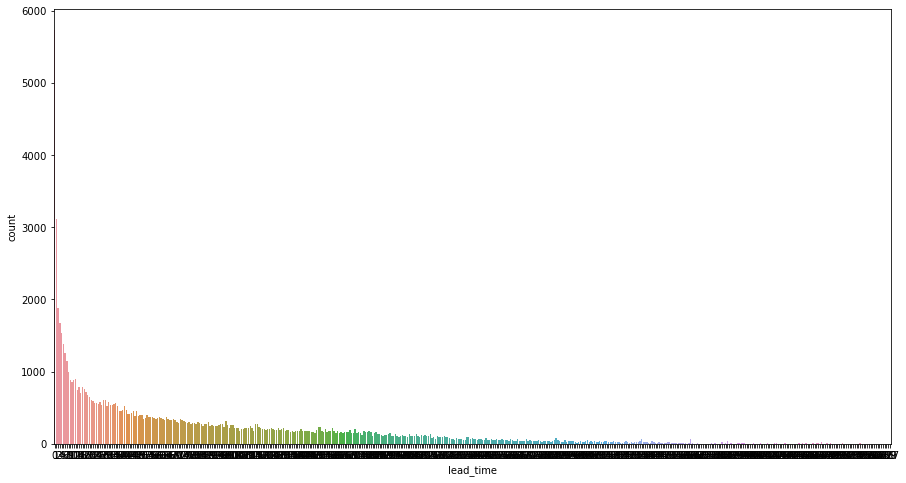

In [54]:
# melihat distribusi data interval (lead_time)
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='lead_time')
plt.show()

Dari grafik diatas deapat dilihat bahwa persebaran data lead_time memiliki distribusi yang berbentuk skew positive, maka dari itu apabila pengelompokan booking berdasarkan interval lead_time akan diklasifikasikan berdasarkan nilai quartil data.

In [55]:
# mengkategorikan booking berdasarkan interval lead time
q1 = df['lead_time'].quantile(0.25)
q2 = df['lead_time'].quantile(0.5)
q3 = df['lead_time'].quantile(0.75)

df['interval_category'] = np.where(df['lead_time']<=q1,'short_interval(0-11_days)',np.where(df['lead_time']>q3 ,'long_interval(>125_days)','medium_interval(12-124_days)'))

In [56]:
# menghitung jumlah booking dan persentase canceled booking berdasarkan interval lead time
interval_category_risk = df.groupby(['interval_category','is_canceled'])['adr'].count().reset_index().rename(columns={'adr':'number_booking'})
interval_category_risk['percentage'] = 100*(interval_category_risk['number_booking']/interval_category_risk.groupby(['interval_category'])['number_booking'].transform('sum'))
interval_category_risk

,interval_category,is_canceled,number_booking,percentage
0,long_interval(>125_days),0,13207,62.068803
1,long_interval(>125_days),1,8071,37.931197
2,medium_interval(12-124_days),0,29343,68.775343
3,medium_interval(12-124_days),1,13322,31.224657
4,short_interval(0-11_days),0,19140,89.615133
5,short_interval(0-11_days),1,2218,10.384867


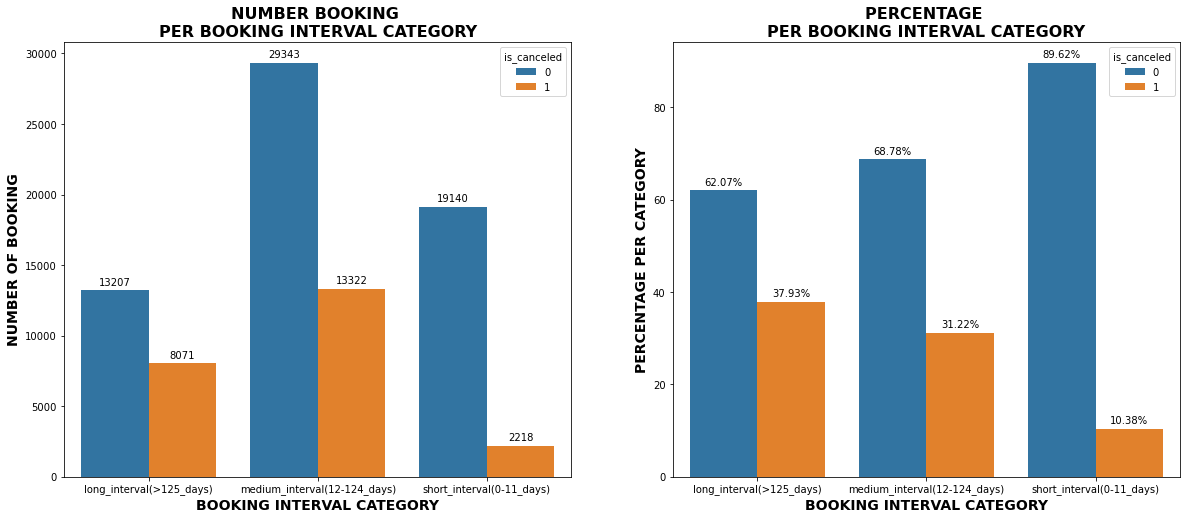

In [57]:
# visualisasi data kategori interval lead time
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
ax = sns.barplot(data=interval_category_risk, x='interval_category', y= 'number_booking', ax=axes[0], hue='is_canceled')
ax.set_title ('NUMBER BOOKING \nPER BOOKING INTERVAL CATEGORY', fontsize = 16, weight='bold' )
ax.set_xlabel ('BOOKING INTERVAL CATEGORY', fontsize = 14, weight='bold')
ax.set_ylabel ('NUMBER OF BOOKING', fontsize = 14, weight='bold')
for p in ax.patches:
  ax.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')


ax1 = sns.barplot(data=interval_category_risk, x='interval_category', y= 'percentage', ax=axes[1], hue='is_canceled')
ax1.set_title ('PERCENTAGE \nPER BOOKING INTERVAL CATEGORY', fontsize = 16, weight='bold' )
ax1.set_xlabel ('BOOKING INTERVAL CATEGORY', fontsize = 14, weight='bold')
ax1.set_ylabel ('PERCENTAGE PER CATEGORY', fontsize = 14, weight='bold')
for p in ax1.patches:
  ax1.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')
plt.show()

Short interval lead time memiliki resiko cancel paling kecil.

In [58]:
# menghitung jumlah booking dan persentase canceled booking per jenis hotel berdasarkan interval lead time
hotel_interval_category_risk = df.groupby(['hotel','interval_category','is_canceled'])['adr'].count().reset_index().rename(columns={'adr':'number_booking'})
hotel_interval_category_risk['percentage'] = 100*(hotel_interval_category_risk['number_booking']/hotel_interval_category_risk.groupby(['hotel','interval_category'])['number_booking'].transform('sum'))
hotel_interval_category_risk

,hotel,interval_category,is_canceled,number_booking,percentage
0,City Hotel,long_interval(>125_days),0,7032,58.429580
1,City Hotel,long_interval(>125_days),1,5003,41.570420
2,City Hotel,medium_interval(12-124_days),0,18975,67.382812
3,City Hotel,medium_interval(12-124_days),1,9185,32.617188
4,City Hotel,short_interval(0-11_days),0,10436,86.923205
5,City Hotel,short_interval(0-11_days),1,1570,13.076795
6,Resort Hotel,long_interval(>125_days),0,6175,66.807314
7,Resort Hotel,long_interval(>125_days),1,3068,33.192686
8,Resort Hotel,medium_interval(12-124_days),0,10368,71.478800
9,Resort Hotel,medium_interval(12-124_days),1,4137,28.521200


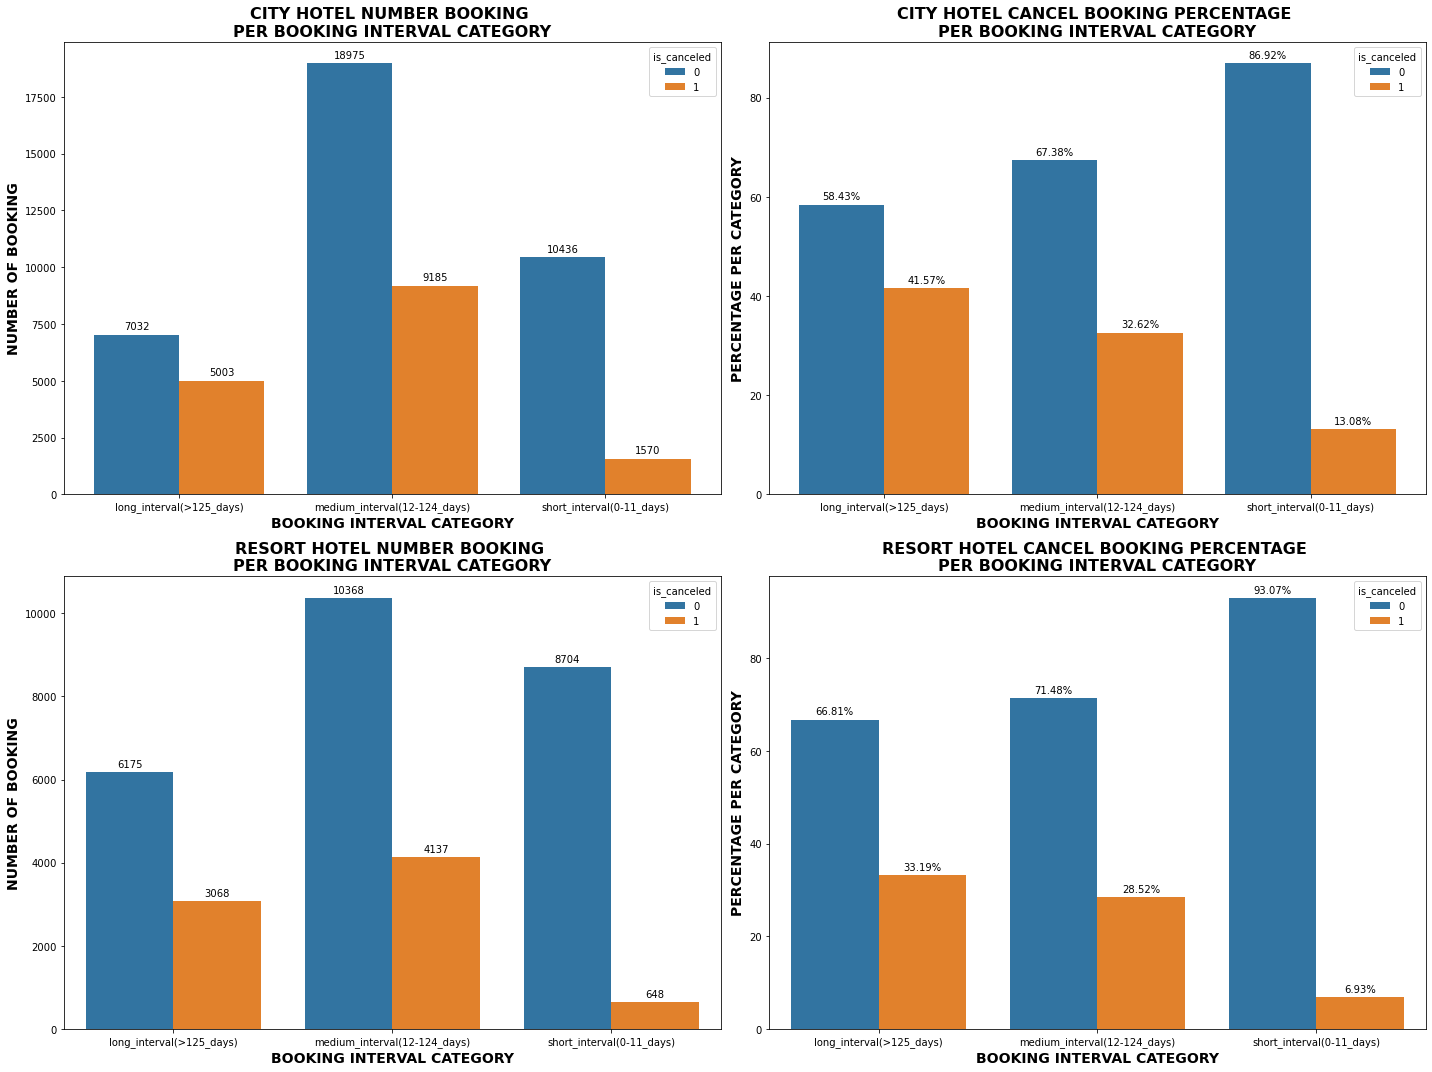

In [59]:
# visualisasi data kategori interval lead time per jenis hotel
city = hotel_interval_category_risk[hotel_interval_category_risk['hotel']=='City Hotel']
resort = hotel_interval_category_risk[hotel_interval_category_risk['hotel']=='Resort Hotel']

plt.figure (figsize=(20,15))

plt.subplot(2,2,1)
ax = sns.barplot(data=city, x='interval_category', y= 'number_booking', hue='is_canceled')
ax.set_title ('CITY HOTEL NUMBER BOOKING \nPER BOOKING INTERVAL CATEGORY', fontsize = 16, weight='bold' )
ax.set_xlabel ('BOOKING INTERVAL CATEGORY', fontsize = 14, weight='bold')
ax.set_ylabel ('NUMBER OF BOOKING', fontsize = 14, weight='bold')
plt.plot()
for p in ax.patches:
  ax.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

plt.subplot(2,2,2)
ax1 = sns.barplot(data=city, x='interval_category', y= 'percentage', hue='is_canceled')
ax1.set_title ('CITY HOTEL CANCEL BOOKING PERCENTAGE \nPER BOOKING INTERVAL CATEGORY', fontsize = 16, weight='bold' )
ax1.set_xlabel ('BOOKING INTERVAL CATEGORY', fontsize = 14, weight='bold')
ax1.set_ylabel ('PERCENTAGE PER CATEGORY', fontsize = 14, weight='bold')
plt.plot()
for p in ax1.patches:
  ax1.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

plt.subplot(2,2,3)
ax2 = sns.barplot(data=resort, x='interval_category', y= 'number_booking', hue='is_canceled')
ax2.set_title ('RESORT HOTEL NUMBER BOOKING \nPER BOOKING INTERVAL CATEGORY', fontsize = 16, weight='bold' )
ax2.set_xlabel ('BOOKING INTERVAL CATEGORY', fontsize = 14, weight='bold')
ax2.set_ylabel ('NUMBER OF BOOKING', fontsize = 14, weight='bold')
for p in ax2.patches:
  ax2.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

plt.subplot(2,2,4)
ax3 = sns.barplot(data=resort, x='interval_category', y= 'percentage', hue='is_canceled')
ax3.set_title ('RESORT HOTEL CANCEL BOOKING PERCENTAGE \nPER BOOKING INTERVAL CATEGORY', fontsize = 16, weight='bold' )
ax3.set_xlabel ('BOOKING INTERVAL CATEGORY', fontsize = 14, weight='bold')
ax3.set_ylabel ('PERCENTAGE PER CATEGORY', fontsize = 14, weight='bold')
for p in ax3.patches:
  ax3.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')
plt.tight_layout()
plt.show()

Baik pada City Hotel maupun Resort Hotel, short interval lead time memiliki resiko cancel paling kecil.